<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹 install all the necessary libraries 
</p>

In [279]:
!pip install pandas
!conda install -c conda-forge pandoc -y
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import openpyxl

'conda' is not recognized as an internal or external command,
operable program or batch file.


<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹 Load  Dataset
</p>

In [161]:
txn=pd.read_excel('QVI_transaction_data.xlsx')
cust=pd.read_csv('QVI_purchase_behaviour.csv')
print('TXN Top 5 Rows')
print(txn.head())
print('cust Top 5 Rows')
print(cust.head())

TXN Top 5 Rows
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
cust Top 5 Rows
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES      

<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹2-Perform High-Level Data Checks
</p>

<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹2.1-Snapshot Summery
</p>

In [162]:
#Check data structure
print('Transection columns')
print(txn.columns)
print('Customer colmuns') 
print(cust.columns)
print('Transection Info') 
print(txn.info())
print('Customer Info') 
print(cust.info())
print('Transection shape') 
print(txn.shape)
print('Customer shape') 
print(cust.shape)
print('Transection columns data types')
print(txn.dtypes)
print('Customer colmuns Data type') 
print(cust.dtypes)
print('Transection Description') 
print(txn.describe(include='all'))

Transection columns
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')
Customer colmuns
Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')
Transection Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
Customer Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data co

<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹2.2 Missing, duplicates, date ranges
</p>

In [163]:
#convert data column to date time
txn['DATE']=pd.to_datetime(txn['DATE'],origin='1899-12-30',unit='D')

 #check date range
                           
print(txn['DATE'].agg(['min','max']))
                           

min   2018-07-01
max   2019-06-30
Name: DATE, dtype: datetime64[ns]


In [164]:
#check missings
print(txn.isna().sum().sort_values(ascending=False))
print('No Missing Found')

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
No Missing Found


In [165]:
#duplicate Check
print(txn.duplicated().sum())

#drop duplicates
txn.drop_duplicates(inplace=True)
#Recheck Duplicates
print(txn.duplicated().sum())

1
0


<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹2.3 Detect & trim extreme outliers (basic IQR rule)
</p>

In [167]:
z_scores=stats.zscore(txn['TOT_SALES'])
outliers=txn[(z_scores>16.78) | (z_scores<-16.78)]
print(outliers_percent)
outliers_percent=(outliers.shape[0]/len(txn))*100
print(outliers.head())
#remove outliers
txn=txn[(z_scores<16.78) & (z_scores>-16.78)]
print(txn.shape)

0.0007551871920252232
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES]
Index: []
(264833, 8)


<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹3  Feature engineering
</p>

<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹3.1 Pack size (grams)
</p>

In [168]:
#extract pack size from product name
txn['PACK_SIZE_G']=txn['PROD_NAME'].str.extract(r'(\d+)\s?[gG]')

#change  pack size column data type str to int
txn['PACK_SIZE_G']=txn['PACK_SIZE_G'].astype(int)

<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹3.2 Brand name
</p>

In [169]:
# extract brand name from product name
txn['BRAND'] = txn['PROD_NAME'].str.extract(r'^([A-Za-z&]+(?:\s[A-Za-z&]+){0,2})')

# remove extra space form brand name column
txn['BRAND'] = txn['BRAND'].str.strip()
#clean brand names
brand_mapping= {
    'RED':'RRD',
    'SNBTS':'SUNBITES',
    'INFZNS':'INFUZIONS',
    'MM':'MOOLWORTHS',
    'SMITH':'SMITHS',
    'NCC':'NATRUAL',
    'DORIO':'DORITOS',
    'GRAIN':'GRNWVES'}
txn['BRAND'] = txn['BRAND'].replace(brand_mapping)
  
print(txn['BRAND'].head())

0                     Natural Chip
1                 CCs Nacho Cheese
2               Smiths Crinkle Cut
3               Smiths Chip Thinly
4    Kettle Tortilla ChpsHny&Jlpno
Name: BRAND, dtype: object


<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹3.3 avg price per unit
</p>

In [187]:
txn['AVG_PRICE_PER_UNIT']=txn['TOT_SALES']/txn['PROD_QTY']

<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹3.4 Temporal fields
</p>

In [170]:
#create year column extract from Date column 
txn['YEAR']=txn['DATE'].dt.year
#create month column extract from Date column
txn['MONTH']=txn['DATE'].dt.to_period('M')
#create week column extract from date column
txn['WEEK']=txn['DATE'].dt.isocalendar().week

<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹4 Merge Transaction and customer data &  customer wise analysis
</p>

In [188]:
#first of all merge both files txn and cus
data=pd.merge(txn,cust, on='LYLTY_CARD_NBR',how='left')
print(data.shape)

(264833, 16)


<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹4.1 Total Spend per customer
</p>

In [273]:
data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().sort_values(ascending=False).reset_index().head()

,LYLTY_CARD_NBR,TOT_SALES
0,230078,138.6
1,63197,132.8
2,259009,127.2
3,162039,126.8
4,58361,124.8


<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹4.2 Transaction frequency per customer
</p>

In [274]:
data.groupby('LYLTY_CARD_NBR')['DATE'].count().sort_values(ascending=False).reset_index().head()

,LYLTY_CARD_NBR,DATE
0,172032,18
1,162039,18
2,13138,17
3,230078,17
4,116181,17


<p style="font-family: Georgia; font-size: 20px; color: dark;">
🔹4.3  Units Bought per Customer
</p>

In [275]:
data.groupby('LYLTY_CARD_NBR')['PROD_QTY'].sum().sort_values(ascending=False).reset_index().head()

,LYLTY_CARD_NBR,PROD_QTY
0,162039,36
1,230078,36
2,172032,35
3,13138,34
4,116181,34


<p style="font-family: Georgia; font-size: 20px; color: dark;">
4.4  Average Spend per Transaction

In [277]:
data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean().sort_values(ascending=False).reset_index(name='AVG_SPEND').head()

,LYLTY_CARD_NBR,AVG_SPEND
0,44350,29.5
1,154199,28.5
2,66014,28.5
3,60198,27.0
4,149267,27.0


<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹5 Data Anaylsis ON Segment Analysis
</p>

<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.1 Total Spend by Segment

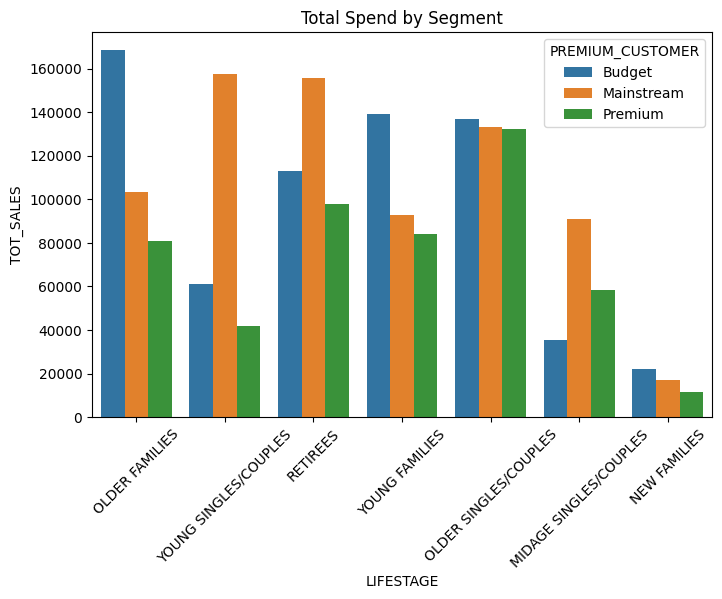

In [184]:
#total spend by lifestage, premium customer
sales=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index() 
plt.figure(figsize=(8,5))
sns.barplot(data=sales,x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER')
# plt.plot(
plt.title('Total Spend by Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('TOT_SALES')
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.2 number of customers by Segment

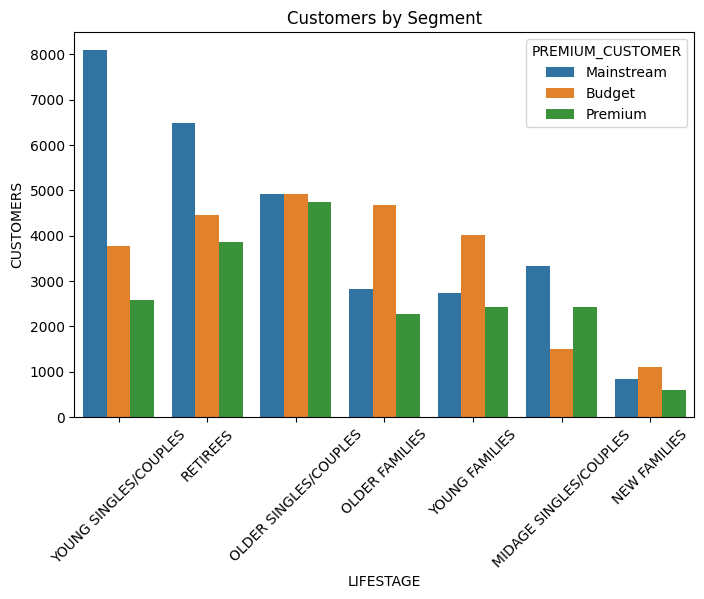

In [183]:
#total spend by lifestage, premium customer
customers=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).reset_index(name='CUSTOMERS')
#plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=customers,x='LIFESTAGE',y='CUSTOMERS',hue='PREMIUM_CUSTOMER')
plt.title('Customers by Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('CUSTOMERS')
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.3 unit per Customer by Segment

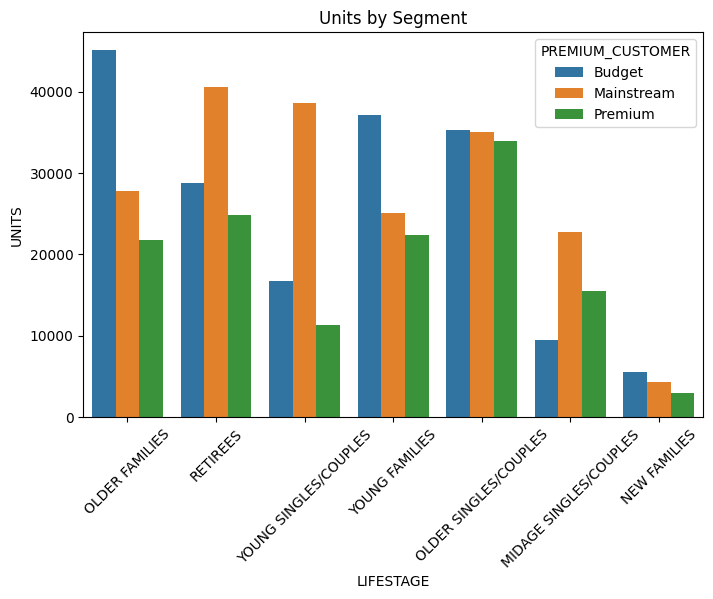

In [265]:
#total spend by lifestage, premium customer
units=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().sort_values(ascending=False).reset_index(name='UNITS')
#plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=units,x='LIFESTAGE',y='UNITS',hue='PREMIUM_CUSTOMER')
plt.title('Units by Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('UNITS')
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.4 AVG price per unit

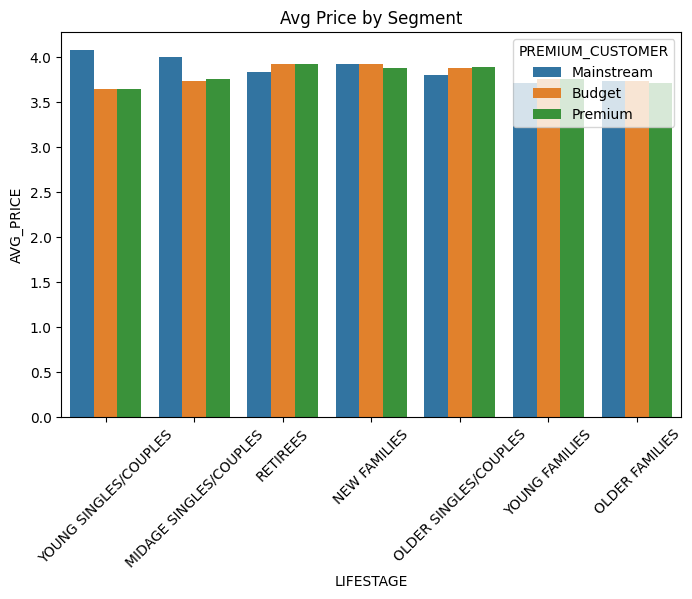

In [226]:
#total spend by lifestage, premium customer
avg_price=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['AVG_PRICE_PER_UNIT'].mean().sort_values(ascending=False).reset_index(name='PRICE')
#plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price,x='LIFESTAGE',y='PRICE',hue='PREMIUM_CUSTOMER')
plt.title('Avg Price by Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('AVG_PRICE')
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.5 pack size by segment

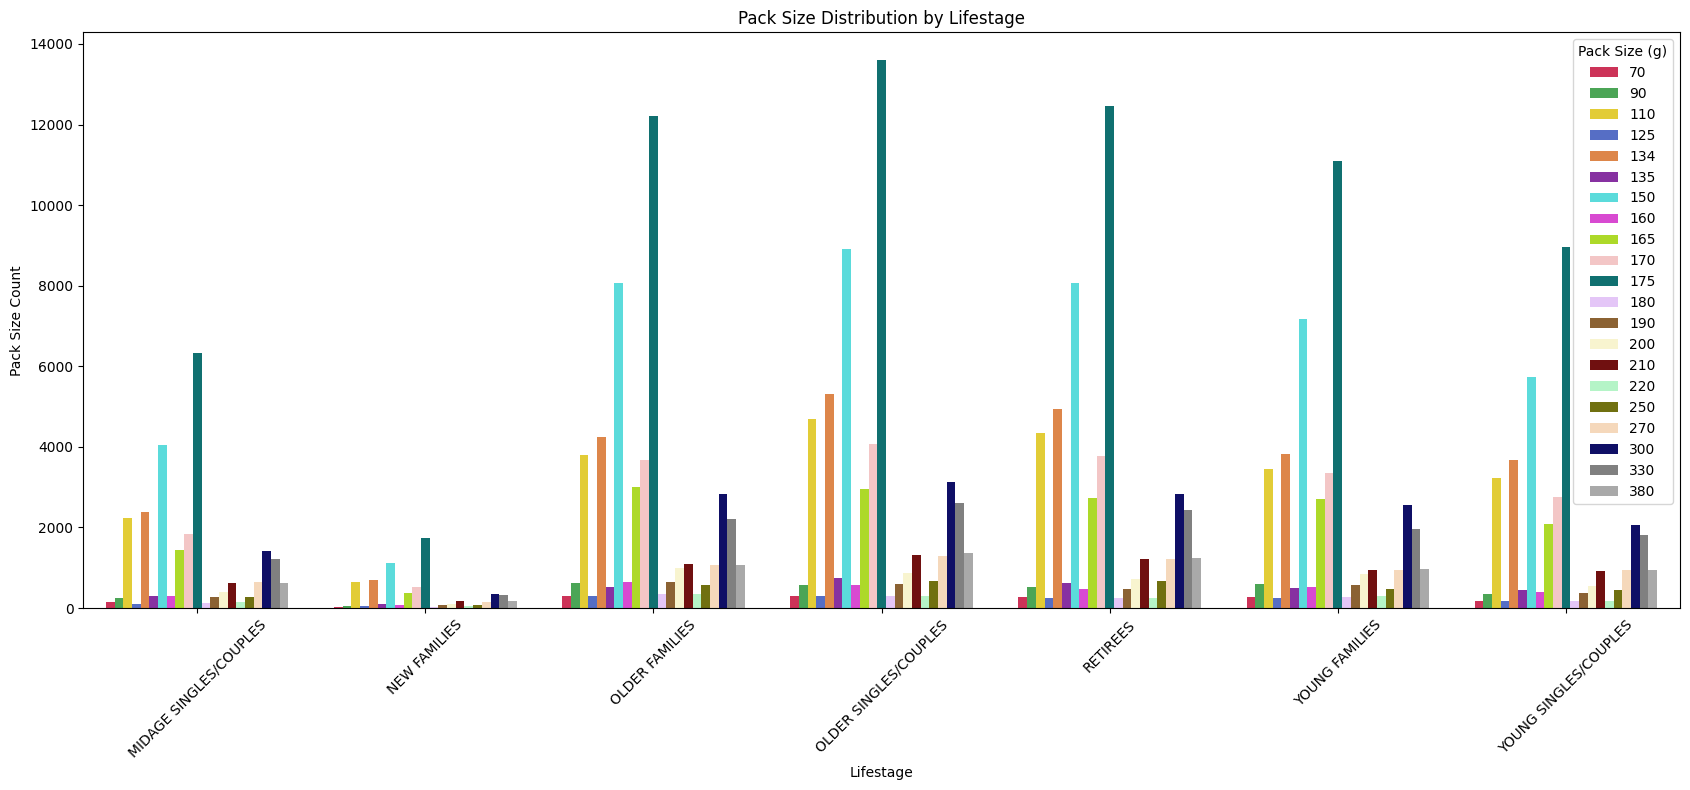

In [244]:

# Group by PACK_SIZE_G and LIFESTAGE and count
pack_size = data.groupby(['PACK_SIZE_G', 'LIFESTAGE']).size().reset_index(name='PACK_SIZE')


custom_palette = {
    70: '#e6194b',
    90: '#3cb44b',
    110: '#ffe119',
    125: '#4363d8',
    134: '#f58231',
    135: '#911eb4',
    150: '#46f0f0',
    160: '#f032e6',
    165: '#bcf60c',
    170: '#fabebe',
    175: '#008080',
    180: '#e6beff',
    190: '#9a6324',
    200: '#fffac8',
    210: '#800000',
    220: '#aaffc3',
    250: '#808000',
    270: '#ffd8b1',
    300: '#000075',
    330: '#808080',
    380: '#a9a9a9'
}

# Plot bar chart
plt.figure(figsize=(17,8))
sns.barplot(data=pack_size, x='LIFESTAGE', y='PACK_SIZE', hue='PACK_SIZE_G', palette=custom_palette)  # Correct column names
plt.title('Pack Size Distribution by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Pack Size Count')
plt.xticks(rotation=45)
plt.legend(title='Pack Size (g)')
plt.tight_layout()
plt.show()


<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.6 pack size by  premuim segment

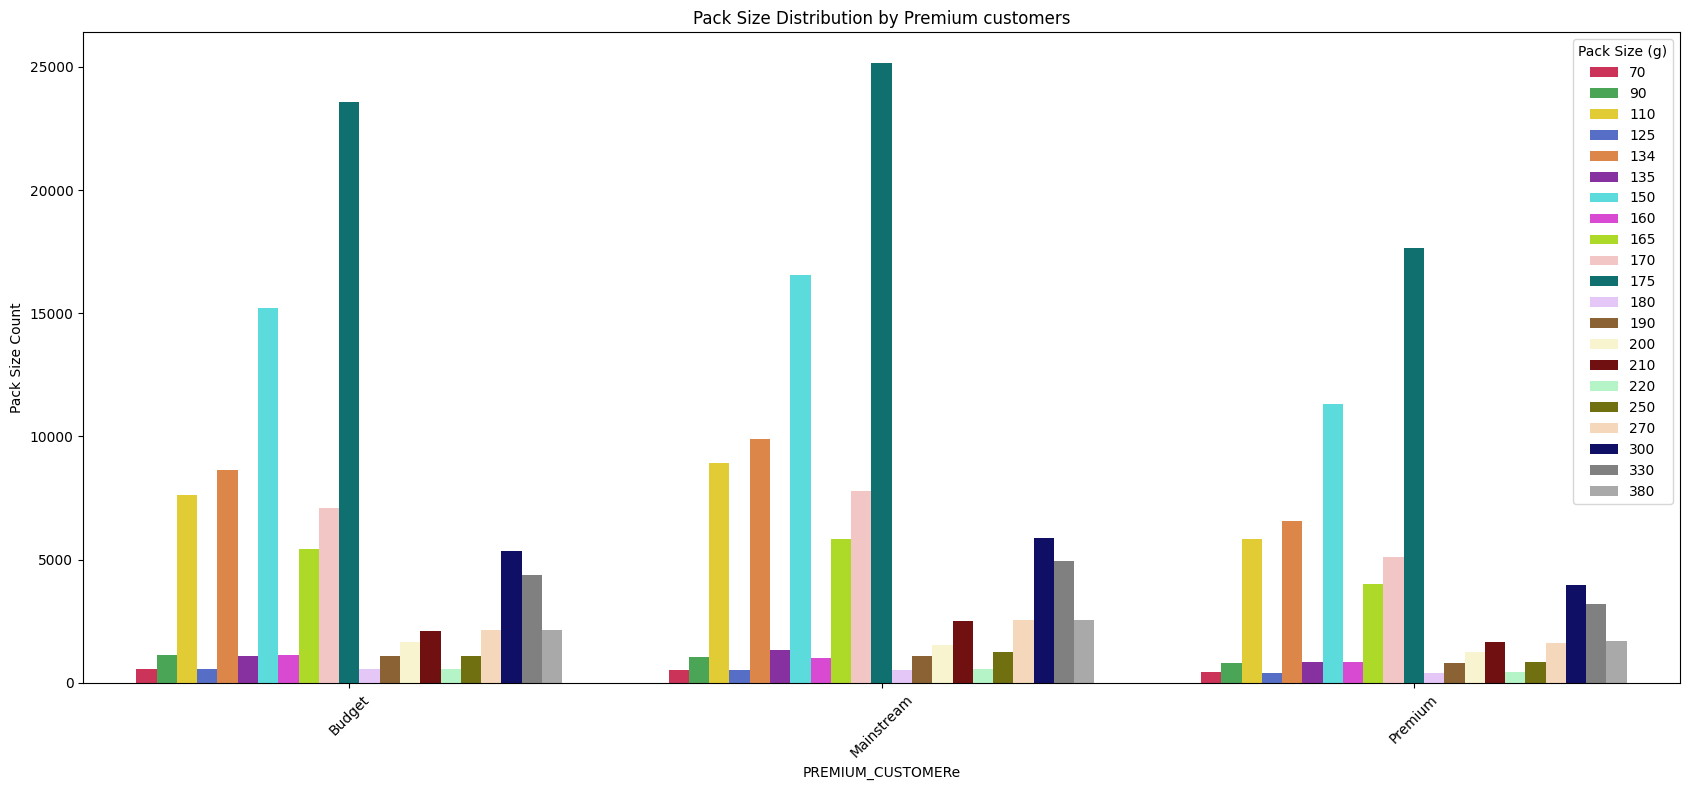

In [269]:

# Group by PACK_SIZE_G and LIFESTAGE and count
pack_size_P = data.groupby(['PACK_SIZE_G', 'PREMIUM_CUSTOMER']).size().reset_index(name='PACK_SIZE')


custom_palette = {
    70: '#e6194b',
    90: '#3cb44b',
    110: '#ffe119',
    125: '#4363d8',
    134: '#f58231',
    135: '#911eb4',
    150: '#46f0f0',
    160: '#f032e6',
    165: '#bcf60c',
    170: '#fabebe',
    175: '#008080',
    180: '#e6beff',
    190: '#9a6324',
    200: '#fffac8',
    210: '#800000',
    220: '#aaffc3',
    250: '#808000',
    270: '#ffd8b1',
    300: '#000075',
    330: '#808080',
    380: '#a9a9a9'
}

# Plot bar chart
plt.figure(figsize=(17,8))
sns.barplot(data=pack_size_P, x='PREMIUM_CUSTOMER', y='PACK_SIZE', hue='PACK_SIZE_G', palette=custom_palette)  # Correct column names
plt.title('Pack Size Distribution by Premium customers')
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('Pack Size Count')
plt.xticks(rotation=45)
plt.legend(title='Pack Size (g)')
plt.tight_layout()
plt.show()


<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.7 brands By segment

In [271]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER','BRAND']).size().sort_values(ascending=False).reset_index(name='BRAND_N').head(10)


,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,BRAND_N
0,OLDER FAMILIES,Budget,Smiths Crinkle Cut,1207
1,YOUNG FAMILIES,Budget,Smiths Crinkle Cut,930
2,YOUNG SINGLES/COUPLES,Mainstream,Doritos Corn Chips,926
3,RETIREES,Mainstream,Smiths Crinkle Cut,901
4,YOUNG SINGLES/COUPLES,Mainstream,Kettle Sensations,883
5,YOUNG SINGLES/COUPLES,Mainstream,Old El Paso,867
6,OLDER SINGLES/COUPLES,Mainstream,Smiths Crinkle Cut,857
7,RETIREES,Mainstream,Kettle Sensations,806
8,RETIREES,Mainstream,Doritos Corn Chips,802
9,OLDER FAMILIES,Budget,Doritos Corn Chips,770


<p style="font-family: Georgia; font-size: 20px; color: dark;">
5.8 Transaction By segment

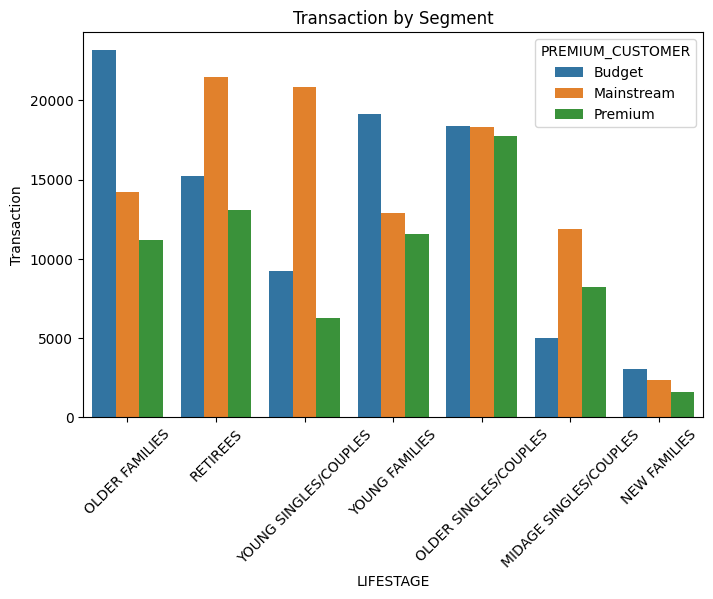

In [268]:
total_transction=data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].count().sort_values(ascending=False).reset_index(name='TXN')
#plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=total_transction,x='LIFESTAGE',y='TXN',hue='PREMIUM_CUSTOMER')
plt.title('Transaction by Segment')
plt.xlabel('LIFESTAGE')
plt.ylabel('Transaction')
plt.xticks(rotation=45)
plt.show()

<p style="font-family: Georgia; font-size: 30px; color: darkblue;">
🔹6 Commercial Insights (For Julia - Category Manager)
</p>

<p style="font-family: Georgia; font-size: 20px; color: dark;">
6.1 High-Value Segment: "OLDER FAMILIES - BUDGET"

A-This group has the highest total spend among all segments.

B-They prefer larger pack sizes (175 or more), indicating higher consumption per purchase.

C-Their favorite brands include Smiths Crinkle Doritos Corn Chips — Budget positioned products.

✅ Recommendation:
Focus marketing efforts on budget products, launch limited-edition flavors, and offer loyalty rewards tailored to this segment.

<p style="font-family: Georgia; font-size: 20px; color: dark;">
6.2 Older Families - Mainstream" Are High Unit Buyers but Lower Spend

A-This group buys chips frequently in smaller pack sizes, leading to a high number of units sold but low average spend per transaction.

B-They're brand loyal, sticking with Smiths and Doritos.

✅ Recommendation:
Introduce family pack bundles or value promotions to encourage higher spend per trip.

<p style="font-family: Georgia; font-size: 20px; color: dark;">
6.3 Untapped Segment: "Midage Singles/Couples - Budget"

A-This segment has low transaction count and spend, suggesting potential for growth.

A-They purchase smaller packs and cheaper brands.

✅ Recommendation:
Test discounts or coupons for premium products to nudge them toward higher-value purchases

<p style="font-family: Georgia; font-size: 20px; color: dark;">
6.4 Pack Size Drives Spend Differently by Segment

A-Mainstream customers consistently buy larger pack sizes, contributing to spend per transaction.(e.g., 150g–200g).

B-Budget segments stick with smaller packs (e.g., 90g–110g).

✅ Recommendation:
Use personalized promotions by segment:

A-Mainstream → "Buy 2 large packs, get 1 free"

B-Budget → "Combo offers on 90g/110g packs

<p style="font-family: Georgia; font-size: 20px; color: dark;">
6.5 Brand Preference Is Segment-Specific

Segment	                   Top Brand

Young Singles - Premium	Red Rock Deli

Older Families - Mainstream         Smiths Crinkle Doritos Corn Chips

New Families - Budget	Doritos / CC's

✅ Recommendation:
Design targeted campaigns per segment-brand combo. For example, push Red Rock Deli bundles in urban singles-dense areas. commmon use brand Smiths Crinkle